# Import modules

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# load data

In [8]:
data = pd.read_csv("Population2.csv")

In [9]:
data

,Year,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Population,10.94,11.252466,11.657479,12.083165,12.52981,12.997447,13.486241,13.995974,14.527187,...,42.542978,43.692881,43,43.3,44.3,45.3,46.4,47.6,48.5,49.4


# Extract the years and population from the DataFrame

In [13]:
years = data.columns[1:]
population = data.iloc[0, 1:].values

# Convert population and years to numeric values

In [18]:
population = pd.to_numeric(population)
years = pd.to_numeric(years)

# Create a pandas Series with the population data

In [20]:
population_series = pd.Series(population, index = years)

# plot the time series data

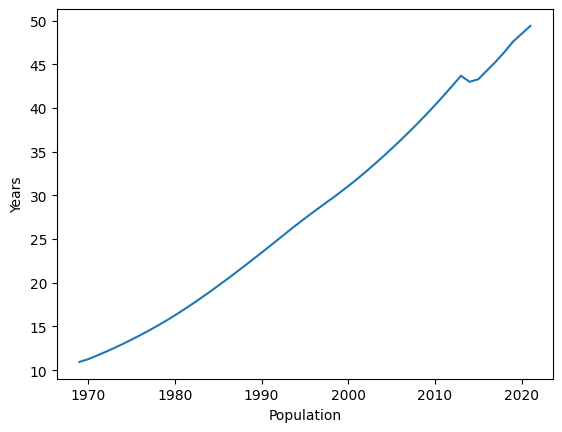

In [16]:
plt.plot(population_series)
plt.xlabel("Population")
plt.ylabel("Years")
plt.show()

# Fit an ARIMA model to the time series data

In [21]:
model = ARIMA(population_series, order = (1, 1, 1))
model_fit = model.fit()

c:\users\wanyoike\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\wanyoike\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\wanyoike\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Forecast future population values

In [22]:
future_years = pd.Index(range(2022, 2031))
forecast = model_fit.predict(start=len(population_series), end=len(population_series) + 8)

c:\users\wanyoike\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\users\wanyoike\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Plot the forecasted values

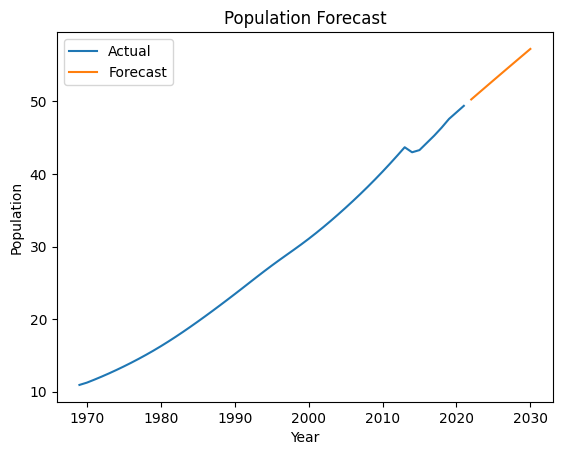

In [25]:
plt.plot(population_series, label='Actual')
plt.plot(future_years, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast')
plt.legend()
plt.show()

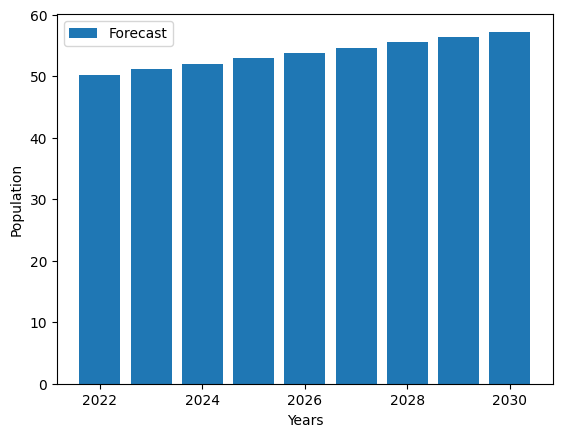

In [27]:
plt.bar(future_years, forecast, label='Forecast')
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend()

# Print the population forecast for 2030


In [29]:
# Print the population forecast for 2030
print("Population forecast for 2030:", forecast[future_years == 2030].values[0])


Population forecast for 2030: 57.24305710018573


# Print the population for the years 2022 to 2030

In [31]:
# Display the forecasted population values for 2022 to 2030
for year, forecast_value in zip(future_years, forecast):
    if year >= 2022 and year <= 2030:
        print("Population forecast for", year, ":", "{:.6f}".format(forecast_value))


Population forecast for 2022 : 50.280422
Population forecast for 2023 : 51.158587
Population forecast for 2024 : 52.034502
Population forecast for 2025 : 52.908173
Population forecast for 2026 : 53.779604
Population forecast for 2027 : 54.648803
Population forecast for 2028 : 55.515774
Population forecast for 2029 : 56.380524
Population forecast for 2030 : 57.243057
